# Generación de curva para un día

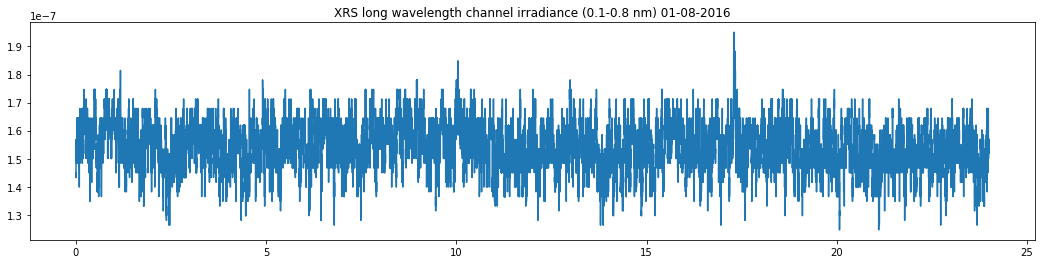

In [1]:
%matplotlib inline
import urllib
import csv
import urllib.request
import matplotlib.pyplot as plt
import time
from datetime import datetime

#creacion del URL a partir de entradas year, month, day
url = "https://satdat.ngdc.noaa.gov/sem/goes/data/full/"
year='2016'
month ='08'
first_day ='01'
final_day ='01'
num_days = int(final_day) - int(first_day) + 1

for d in range(0,num_days):
    
    day = "{:0>2d}".format(int(first_day) + d)
    
    # generacion del url
    site = url + year + "/" + month + "/goes13/csv" + "/" + 'g13_xrs_2s_' + year + month + day + "_" + year + month + day + '.csv'

    # extraccion de los datos a partir del archivo CSV en la web de GOES13
    webpage = urllib.request.urlopen(site)
    datareader = csv.reader(webpage.read().decode('utf-8').splitlines())

    data = []
    timex = []
    flux = []
    grtime = []

    for row in datareader:
        data.append(row[0:7])

    for row in data[141:42328]:
         timex.append(row[0])
         flux.append(row[6])
        
    # correccion eje tiempo
    first_date = time.mktime(datetime.strptime(timex[0],"%Y-%m-%d %H:%M:%S.%f").timetuple())
    
    for row in timex:
        grtime.append((time.mktime(datetime.strptime(row,"%Y-%m-%d %H:%M:%S.%f").timetuple())-first_date)/3600)
    
    # generacion de la curva 
    plt.figure(figsize=(18,4))
    plt.title('XRS long wavelength channel irradiance (0.1-0.8 nm) {0}-{1}-{2}'.format(day,month,year))
    plt.plot(grtime, flux)
    plt.show()  